In [1]:
# Data Preprocessing

In [2]:
## References for Preprocessing Waveform

A Specific Earthquake Processing Workflow for Studying Long-Lived, Explosive Volcanic Eruptions With Application to the 2008 Okmok Volcano, Alaska, Eruption
Ricardo Garza-Girón, Emily E. Brodsky, Zack J. Spica, Matthew M. Haney, Peter W. Webley


We processed all day-long waveforms by applying a linear detrending, removing the mean of the data, applying a Hanning taper of 5% in each end of the waveform and applying a bandpass Butterworth filter between 5 and 12 Hz. To make the templates, we selected windows of 3 s around the P wave (0.2 s before P-arrival to 2.8 s after P-arrival) and whenever S-phase information was available, 2 s around the S wave (0.2 s before S-arrival to 1.8 s after S-arrival). We used 0.6 as the absolute cross-correlation value threshold for all detections and scanned individual channels in parallel using EQcorrscan. This procedure yielded 1,229,681 individual detections.

Low frequency seismic source investigation in volcanic environment: the Mt. Vesuvius atypical case
Simona Petrosino and Paola Cusano


For the polarization analysis, we selected a 0.9 s-long time window starting from the P wave onset and filtered the waveforms using a bandpass acausal Butterworth filter in the 2.5–4.5 Hz frequency band. The polarization parameters were estimated using a sliding time window with length equal to the maximum investigated period and overlap of 50 %. Finally, results associated with highly linearly polarized body waves were extracted by taking those values of azimuth and incidence angle corresponding to RL higher than 0.7.

Volcanic earthquake catalog enhancement using integrated detection, matched-filtering, and relocation tools
Darren Tan
Darren Tan1*David FeeDavid Fee1Alicia J. Hotovec-EllisAlicia J. Hotovec-Ellis2Jeremy D. PesicekJeremy D. Pesicek3Matthew M. HaneyMatthew M. Haney4John A. PowerJohn A. Power4Trsilo GironaTársilo Girona1

We bandpass filter seismic data from the Redoubt Volcano network between 1 and 10 Hz for triggering and cross-correlating purposes.



Ardid, A., Dempsey, D., Caudron, C. et al. Ergodic seismic precursors and transfer learning for short term eruption forecasting at data scarce volcanoes. Nat Commun 16, 1758 (2025). https://doi.org/10.1038/s41467-025-56689-x


Three data streams are generated by bandpass filtering to three frequency ranges, which captures different parts of the volcano-seismic signal. Filtering between 2 to 5 Hz focuses on a tremor signal of frequent volcanic origin while excluding ocean noise at lower frequencies (mainly <1 Hz). This filtered time series was incremented into 10-min, non-overlapping windows with the average absolute velocity computed for the window. We refer to this as Real-time Seismic Amplitude Measurement (RSAM) although we acknowledge that RSAM is sometimes computed on the unfiltered or very loosely filtered trace, e.g., 0.5–20 Hz to exclude microseism/anthropogenic contributions. We compute Median Frequency (MF) and High Frequency (HF) data streams in the same way as RSAM but instead filtering in the range of 4.5 to 8 Hz and 8 to 16 Hz, respectively. These two data streams focus on signal attenuation effects above the frequency range from which tremor energy is commonly radiated16. Finally, Displacement Seismic Amplitude Ratio (DSAR) is calculated as the ratio of the integrals of the MF and HF signals22. High values of DSAR have been inferred to correlate with high gas levels in the edifice, suggesting either reduced fluid motion and/or trapping that has led to a gas-accumulation38,51. Time series gaps were imputed by linear interpolation and because these gaps occur in noneruptive periods, a later step of downsampling reduces their impact on the models50.

Kurihara, R., Kato, A., Kurata, S. et al. Detection of low-frequency earthquakes by the matched filter technique using the product of mutual information and correlation coefficient. Earth Planets Space 73, 225 (2021). https://doi.org/10.1186/s40623-021-01534-w

We apply a 1–8 Hz bandpass filter, and decimate the waveform from 100 to 25 Hz sampling before calculations.

However, we used the bandpass-filtered waveform data after removing its mean and trend. Therefore, the mean of the template and data in the target window is very small (0–2% of the maximum value for most of the template waveforms in this study), such that we can ignore the mean to calculate CC in this study.

Manuela Köpfli, Marine A. Denolle, Weston A. Thelen, Peter Makus, Stephen D. Malone; Examining 22 Years of Ambient Seismic Wavefield at Mount St. Helens. Seismological Research Letters 2024;; 95 (5): 2622–2636. doi: https://doi.org/10.1785/0220240079

Methods: Feature extraction
We used six methodologies dedicated to continuous seismic recordings to analyze Mount St. Helens structural evolution. The preprocessing (detrending, tapering, and removal of the instrumental response of each day‐long time series) remains identical across all methodologies. All features are averaged over the array by stacking or convolving, unless otherwise mentioned.

Statistical features
We explore standard seismic features, including root mean square (rms), root median square (RMeS), peak ground velocity (PGV), and peak ground acceleration (PGA). These are measured on 10‐minute windows seismic data. 

Peter Makus, Marine A. Denolle, Christoph Sens‐Schönfelder, Manuela Köpfli, Frederik Tilmann; Analyzing Volcanic, Tectonic, and Environmental Influences on the Seismic Velocity from 25 Years of Data at Mount St. Helens. Seismological Research Letters 2024;; 95 (5): 2674–2688. doi: https://doi.org/10.1785/0220240088

We apply an anti‐alias filter with a low‐pass frequency of 2.25 Hz, decimate the data to 5 Hz, detrend, taper, remove the instrumental response from the daily data, and band‐pass filter the data between 0.01 and 2.5 Hz. Then, we slice the data into one‐hour‐long windows, detrend, and taper the windows’ ends by 3%. The data are then filtered in three one‐octave‐wide frequency bands: 0.25–0.5, 0.5–1, and 1–2 Hz, resulting in three different datasets. Subsequently, we apply one‐bit normalization in the time domain. We obtain three groups of correlation functions (CFs): autocorrelations (single channel pairs), self‐correlations (single station, multichannel pairs), and cross‐correlations (multistation, multichannel pairs). For self‐ and cross‐correlations, we whiten the amplitude spectrum of the data (Bensen et al., 2007) in the Fourier domain. Finally, we average the resulting CFs over five days to reduce the amount of data and smooth the stacked CFs with a 60‐day‐wide moving Hanning taper, thereby weighing the contributions of particular five‐day stacks.

## Preprocessing

Standard preprocessing of day-long waveforms by applying a linear detrending, removing the mean of the data, applying a Hanning taper of 5% in each end of the waveform and applying a bandpass Butterworth filter.

In [1]:
# read and preprocess a file
from obspy import read
import os

def preprocess(stream):
    # detrend waveform
    st_process = stream.copy()
    
    st_process.detrend("linear")
    st_process.detrend("demean")    
    st_process.taper(max(10.0 / st[0].stats.sampling_rate, 0.05))
    st_process.filter("bandpass", freqmin=5, freqmax=10, corners=4, zerophase=True)

    return st_process
    

Data is common split into 24 hour intervals. We can write a function that splits a preprocessed file into one day chunks.

In [2]:
from obspy import UTCDateTime

def split_stream_by_day(stream):
    if len(stream) == 0:
        raise ValueError("Stream is empty")

    # Get the start and end times
    data_start = stream[0].stats.starttime
    data_end = stream[-1].stats.endtime
    
    daily_streams = []
    
    # Align to midnight UTC
    current_start = UTCDateTime(data_start.year, data_start.month, data_start.day)
    
    # If data starts after the midnight before it, start from that midnight
    # Otherwise start from the next midnight
    if data_start > current_start:
        # Data starts partway through a day, first split will be partial
        pass
    else:
        # Start from the actual data start time
        current_start = data_start
    
    day_count = 0
    
    # Loop through each 24-hour period
    while current_start < data_end:
        current_end = current_start + 86400  # 24 hours in seconds
        
        # Trim to current window
        st_day = stream.copy()
        st_day = st_day.trim(starttime=current_start, endtime=current_end)
        
        # Only add if there's data
        if len(st_day) > 0 and any(tr.stats.npts > 0 for tr in st_day):
            daily_streams.append(st_day)
            day_count += 1        
        current_start = current_end
    print(f"\nTotal days split: {len(daily_streams)}")
    
    return daily_streams

Let's plot the original stream against the processed stream for one station for one day.


Total days split: 29


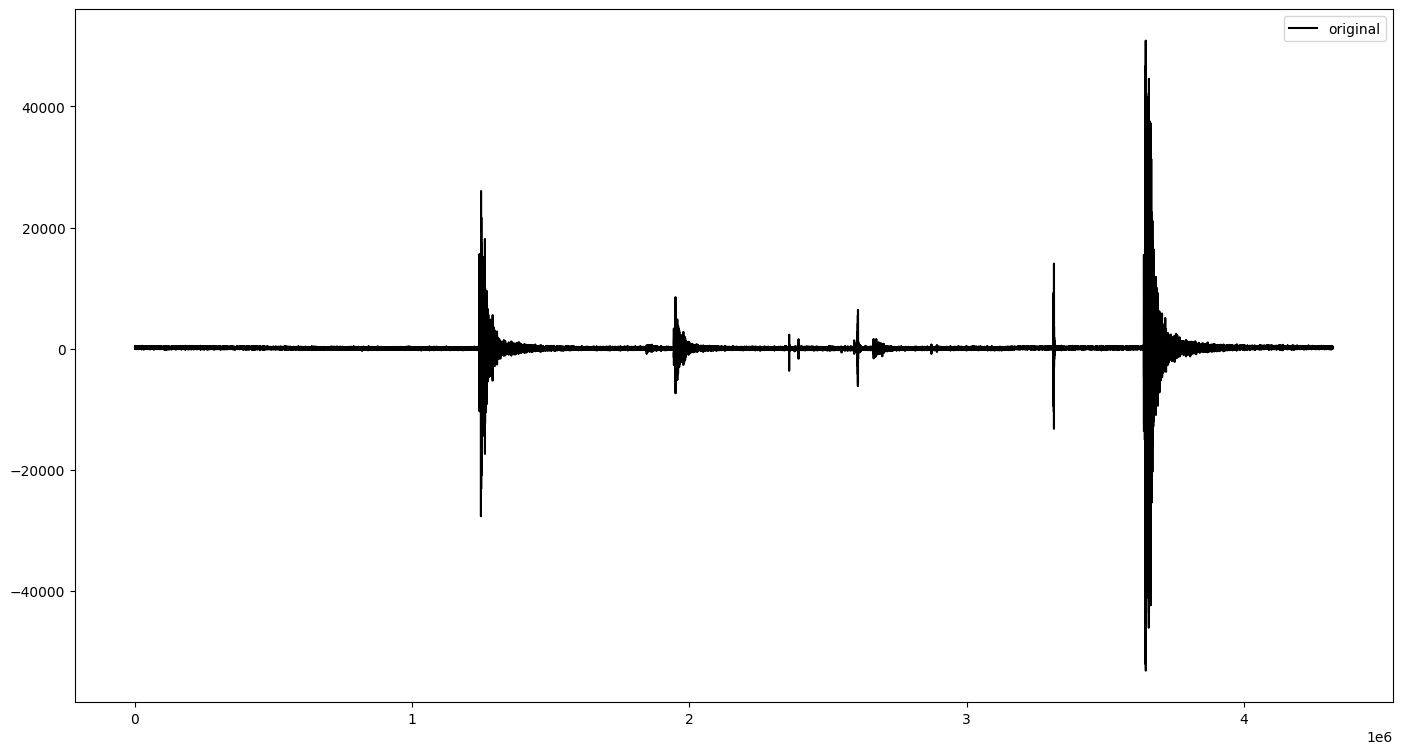

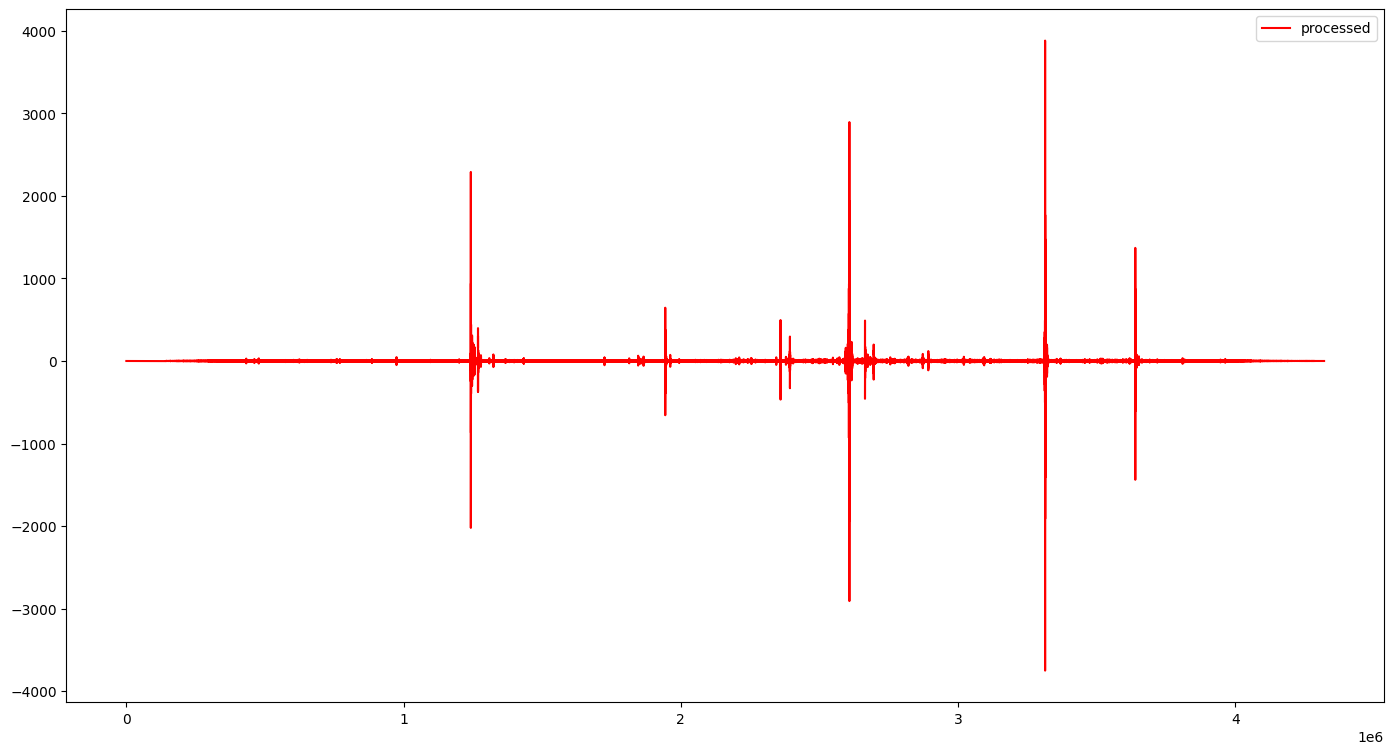

In [7]:
import matplotlib.pyplot as plt

# get a list of miniseed files in the seismic_data directory
data_dir = "seismic_data"
files = [os.path.join('./seismic_data', f) for f in os.listdir('./seismic_data') 
         if os.path.isfile(os.path.join('./seismic_data', f))]

# read the first file and preprocess it
st = read(files[0])
st_copy = st.copy()
st_one_day = split_stream_by_day(st_copy)
st_processed = preprocess(st_one_day[0])

# plot the original data against the processed data for comparison
plt.figure(figsize=(17,9))

# plot first day from list of streams split by day
for tr in st_one_day[0]:
    data_original = tr.data
plt.plot(data_original,color='black',label='original')
plt.legend()

# plot first day in the list of processed stream
plt.figure(figsize=(17,9))
for tr in st_processed:
    tr_processed = tr.data
plt.plot(tr_processed,color='red',label="processed")
plt.legend()



In [6]:
# get a list of miniseed files in the seismic_data directory
data_dir = "seismic_data"
files = [os.path.join('./seismic_data', f) for f in os.listdir('./seismic_data') 
         if os.path.isfile(os.path.join('./seismic_data', f))]

# read the first file and preprocess it
st = read(files[0])
st_copy = st.copy()
st_split = split_stream_by_day(st_copy)

for stream in st_split:
    for tr in stream:
        print(tr.stats)



Total days split: 29
         network: XD
         station: MC06
        location: 
         channel: BHE
       starttime: 2015-06-01T00:00:00.015000Z
         endtime: 2015-06-01T23:59:59.995000Z
   sampling_rate: 50.0
           delta: 0.02
            npts: 4320000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 27634, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 326524928})
      processing: ['ObsPy 1.4.2: trim(endtime=UTCDateTime(2015, 6, 1, 23, 59, 59, 995000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2015, 5, 31, 23, 59, 59, 995000))']
         network: XD
         station: MC06
        location: 
         channel: BHN
       starttime: 2015-06-01T00:00:00.015000Z
         endtime: 2015-06-01T23:59:59.995000Z
   sampling_rate: 50.0
           delta: 0.02
            npts: 4320000
           calib: 1.0
         _format: MSEED
           mseed: AttribD